In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Intro

In Classical ML, the paradigm was
- construct, by hand, transformations of the input to alternatate representations
    - feature engineering: create representations corresponding to a "concept" useful for classification
    - we called this a pipeline
- after multiple transformations, the representation was good enough that a classifer could separate classes

In Deep Learning, the paradigm is very similar
- a sequence of transformations
    - each transformation is called a "layer"
        - "Deep Learning" is many layers of transformation
    - each layer successively constructs a new representation
    
**The key difference from Classical ML**:
- the transformations are "discovered"  rather than hand engineered
    

# Deep Learning: the cartoon
Here is a "cartoon" diagram of Deep Learning (as applied to Classification)

![Deep Learning cartoon](images/DL_Classifier.jpg)

- the large vertical box at the left in the input (e.g., example: training or test)
- the smaller vertical boxes are "layers"
- the final layer (drawn outside the big box
    - is a layer that implements a Classifier
        - e.g., Logistic Regression

The input will be refered to as layer $0$.

Layer $(\ll + 1)$:
- takes as input: the output of layer $\ll$
- produces an output that is the transformed version of its input
    - the sizes of the inputs and outputs may be *very different*
    - determined by the internal workings of the layer

You can think of the output of each layer (inlcuding layer $0$) as being
alternate representations of our example's features.

So the NN is successively transforming the example's input features into
different *representations*.



You can think of the represenation of layer $(\ll + 1)$ as being more complex or "higher level" than
that of layer $\ll$.

The goal of more complex representations is to eventually enable the final layer (e.g., Classifier)
to be able to separate example classes.

Perhaps the lower level representations are not sufficient to enable the Classifier to succeed.

Our old friend, the dot product, will play a starring role.
- it is a fundamental part of many layers that we will study

Let's start with our the inputs to the NN: an example with our original features

Recall that the dot product can be thought of implementing a kind of "pattern matching:
- looking for a subset of features in an example

So one way to think of the transformations implemented by the **first layer** is that it
- recognizes patterns in the layer's input
- construct new "higher level" features

These higher level features may (or may not) be sufficient
- for a Classical Classifier to be able to correctly classify training examples
- for a Classical Regression to be able to correctly predict continous values

This also explains why we may need more than one layer
- layer $(\ll +1)$ takes as its input: the "high level feature" contructed by layer $\ll$
- with the benefit of a higher (compared to the training example) level features
    - we might match more complex patterns
    - and create even higher level features as output of layer $(\ll +1)$

# Notation 1

Layer $\ll$:

- output of layer $\ll: \y_\llp$
    - subscripts in parenthesis refer to layer numbers
- input of layer $\ll: \y_{(\ll-1)}$
- layer $0$ (*the input layer*) is where our examples are input
    - $\y_{(0)} = \x$
    
Let $L$ denote the number of layers
- Final output of the NN:
    - $\y = \y_{(L)}$
    

<div>
    <center>Layers</center>
    <br>
<img src=images/NN_Layers.jpg width=2500>
    </div>

# How does the NN "learn" the transformations ?

The answer is not too different than what we learned in Classical Machine Learning
- each layer has a set of parameters, e.g, $\Theta_{(\ll)}$ for layer $\ll$
- so the entire NN (the "model") has a collection of paramters $\Theta$
- we define a per-example cost function
    - for our Classification or Regression problem
- we "solve" for the $\Theta$ that minimizes our Average (across examples) Cost

But how do we find the Cost-minimizing $\Theta$ ?
- In Classical ML: we sought closed-form solutions: Linear/Logistic Regression
- In Deep Learning: we will *search* for the best $\Theta$
    - using search: we are able to use more complex Cost functions
    
**Note**

In DL, $\Theta$ is often refered to as the NN's *weights* and will thus often be denoted by $\W$ rather than $\Theta$.

## Training: finding the best $\W$

We begin by reviewing
- Cost functions
- Gradient Descent

### Review

**Cost/Loss, Utility/Optimization: review**

- The prediction $\hat{\y}^{(i)}$ for example $\x^\ip$ is perfect if it matches the true label $\y^\ip$

$$ \hat{\y}^\ip = \y^\ip$$

- The distance between $\hat{\y}^{(i)}, \y^\ip$  is called the *Loss* (or *Cost*) for example $i$:

$$
\loss^\ip_\Theta =  L( \hat{\y}^\ip , \y) 
$$

where $L(a,b)$ is a function that is $0$ when $a = b$ and increasing as $a$ increasingly differs from $b$.

Two versions $L$ that we've seen are Mean Squared Error (for Regression) and Cross Entropy Loss (for classification).

The Loss for the entire training set is simply the average (across examples) of the Loss for the example

$$
\loss_\Theta  = { 1\over{m} } \sum_{i=1}^m \loss^\ip_\Theta
$$

Whereas Loss describes how "bad" our prediction is, we sometimes refer to the converse -- how "good" the prediction is.

We call the "goodness" of the prediction  the *Utility* $U_\Theta$.

So we could state the optimization objective either as
"minimize Cost" or "maximize Utility".

By convention, the DL optimization problem is usually framed as one of minimization (of cost or loss) 
rather than maximization of utility.

**Gradient Descent review**

- $\loss_\Theta$ is a function of parameters $\Theta$
- The (negative of) the derivative of $\loss_\theta$ points in the direction of $\Theta$ that reduces 

- One *step* of Gradient Descent updates $\Theta$ in the direction that reduces $\loss_\Theta$
$$
\Theta_{(t + 1)} = \Theta_\tp - \alpha * \frac{\partial \loss_\Theta}{\partial \Theta}
$$
where
    - subscript in parenthesis refers to the step number of Gradient Descent
        - update equation is for step $(t+1)$
    - $\alpha$ is the *learning rate*
    

**Minibatch Gradient Descent review**

$\loss_\Theta$ is the sum of $m$ per-example losses 
$$
    \loss_\Theta = \frac{1}{m} \sum_{i=1}^m \loss_\Theta^\ip
    $$
- expensive to compute, for large $m$
- can *approximate* $\loss_\Theta$ by evaluating it
    - across a *random subset ( of size $m' \le m$)* of  examples: $I = \{ i_1, \ldots, i_{m'} \}$
    $$
    \loss_\Theta \approx \frac{1}{|I|}\sum_{i \in I} \loss_\Theta^\ip
    $$

Whereas Gradient Descent computes an exact $\loss_\Theta$ to perform a single update of $\Theta$:

*Minibatch Gradient Descent*
- takes $b = m/m'$ smaller steps, each updating $\Theta$
- each small step using an approxmation of $\loss_\Theta$ based on $m' \le m$ examples

It does this by
- choosing batch size $m'$
- partitioning the set of example indices $\{i | 1 \le i \le m \}$
    - into $b$
    *batches* of size $m'$
    - batch $i': b_{(i')}$ is one partition consisting of $m'$ example indices
    - Each small step uses a single batch to approximate $\loss_\Theta$ and update $\Theta$

The collection of $b$ small steps (comprising all examples) is called an *epoch*

So one epoch of Minibatch Gradient Descent performs $b$ updates

## The Training loop

The way we find the cost-minimizing $\Theta$ is by using Gradient Descent (or Minibatch Gradient Descent)
on the Cost function $\loss_\Theta$.

This is implemented in a loop called the *training loop*

During each iteration (epoch) $t$ of the loop
- We compute $\hat{\y}^\ip$ for all $m$ examples
    - Present $\x^\ip$ to the input layer of the NN
    - Evaluate $\hat{\y}^\ip$ using the current value for $\Theta: \Theta_{(t)}$
        - compute $\y_\ll$ for each layer $0 \le l \le L$
        - $\hat{\y}^\ip = \y_L$
- Each example $i$ has it's per-example loss $\loss_\Theta^\ip$

- The per-example losses contribute to a gradient (exact or approximate)
- The loss per batch causes a single update to $\Theta$

So the Training Loop implements a Gradient Descent or one of its variants.

In "the old days" the **user** wrote the Training Loop.

Using a higher level API (like Keras) the loop is implemented for you in a single call.

This is called *training* or *fitting* the model.

We will examine both the high level API and the low level implementation.

# Layers

We will learn about several primitive types of layers:
- Dense/Fully Connected
- Activation
- Convolutional
- Recurrent
- Lambda
    - occassionally you will have to write  your own operations
        - TensorFlow native operations: multiplication, addition
        

By "drawing a box" around a sequence of layers
- you can create a more complex layer
- same API, but hidden steps in the middle

Think of a Layer as a sequence of one or more
- Primitive layers (sequence of length 1, see above)
- Non-primitive layers
    - can treat a sequence of length greater than 1 as a single layer (treat the middle as a black box_

## The Dense (Fully Connected) Layer

The first layer type we will learn about is called the *Dense* or *Fully Connected (FC)* layer.

Let layer $\ll$ in the Sequential Model by a Dense layer
- It's inputs are $\y_{(\ll-1)}$ and outputs $\y_\llp$
- It consists of $n_\llp$ *neurons* (nodes)
    - So $| \y_\llp| = n_\llp$
- Each neuron $j$ performs a dot product of
    - $\y_\llp$ and a set of per neuron parameters $\W_{\llp,j}$
        - where $\W_{\llp,j}$ is a vector of length $|\y_{(\ll-1)}|$
    - adds a constant per neuron *bias* $\b_j$

$$\y_{\llp, j} = \y_{(\ll-1)} \cdot \W_{\llp,j} + \b_j$$

To summarize Dense Layer $\ll$
- Its inputs are a representation (vector of features) of length $|\y_{(\ll-1)}|$
- It outputs a represenation of length $|\y_\llp|$

We can combine the $\W_{\llp,j}$ for each $1 \le j \le n_\llp $ into an $( n_\llp \times n_{(\ll-1)})$ matrix
$\W_\llp$ and write
$$
\y_\llp = \W_\llp \y_{(\ll-1)} + \b_\llp
$$

- The number of parameters (size of $\W_\llp$) is
$$
| \W_\llp | = |\y_\llp| * ( |\y_{(\ll-1)}| + 1 )
$$
    - one output for each of the $n_\llp = | \y_\llp|$ neurons
    - each neuron $j$ has
        - $|\y_{(\ll-1)}|$ parameters to use in the dot product with $\y_{(\ll-1)}$
        - one bias $\b_j$

The Dense Layer is also called *Fully Connected* 
- each output is "connected" to each  input, via a single neuron.

**Note**

ALWAYS count the number of parameters
- They add up quickly !
- Dense Layers are particularly greedy
    - product of input size and output size

## Dense Layer as pattern matching

Given an input representation, how do we tell whether it matches a certain feature ?
- weights as pattern
- dot product computes score
    - score is high if input is similar to pattern

So the Dense Layer $\ll$ can be thought of as creating $|\y_\llp|$ "more complex" features.

We *don't* tell the NN what these features should be
- they are *discovered* (learned) by solving the Cost Function minimization 

The fact that the new representation is learned rather than specified often makes
the process of Deep Learning (and the intermediate represenations) it produces
*difficult to interpret*.

We will make some attempts at interpretability throughout this course.

Although it is easiest to think of representations as one dimensional, that will rarely be the case
- images are a representation that is 2 or 3 dimensional (color channel)
- if a layer produces $n$ features, its output volume has a "depth" of $n$
    - so the 3d image (2d plus one channel for each of 3 colors), after passed through a layer creating $n$ features, now has depth $n$ rather than 3
    
So best to think of "dot product" as 
- element-wise multiplication of input representation with weights of same dimensionality
- reduce (sum) to scalar

### Classical ML versus Deep Learning: MNIST digit recognition

Imagine we were trying to recognize MNIST digits in the Classical ML setting.

We might *hand-engineer* features using two levels of transormations before sending the new features to a Classifier

- layer 1: features
    - horizontal top
    - horizontal botton
    - diagonal, each direction
- layer 2: combo of layer 1 features
    - horizontal top and diagonal
    

This might seem like the way to do digit recognition were we to perform feature engineering by hand.

But our intuition of what features are useful may be off, or at least, sub-optimal

Deep Learning 
- is an optimization that solves for patterns  that prove
most useful for  classification.

## Activation Layers

Observe that a Dense Layer is performing a linear transformation (because of the dot product).

From Linear Algera: the composition of linear transformations is itself a single linear transformation.

So there would be *no mathematical purpose* to a Sequential Model consisting of only Dense Layers.


Key aspect separating Classical ML from Deep Learning
- DL can *also* implement
*non-linear transformations*.

This turns out to be incredibly powerful.

In turn, a key in enabling this power is that we optimize the Cost Function by *search*
- closed form solutions for Non-Linear functions are hard !

Deep learning programming appends  a "non-linear" *Activation Layer* at the end of every linear layer.
- there is a default Activation associated with each layer
- so, in practice, you specify the Activation layer as a parameter in constructing another layer
- know the default activation for your layer !

By doing so, the composition of layers is no longer linear.

Non-linearity allows us to compute arbitrary functions
- A NN is a Universal Function Approximator


The non-linearity is called an "activation" because it typically acts like a threshhold:
- if the linear "dot product score" is high, pass the score through to the ouptut
- otherwise reduce it to (near) 0

The activation introduces the ability to compute non-linear transformations as well as a mechanism to
separate High scores ("has feature") form insignificant scores.


### Some Activation Layers

There are several choices for the non-linear activation layer.

To get some intuition, let's show the plot of each, along with its derivative.

The derivative is **very important** as it will come into play during Gradient Descent.

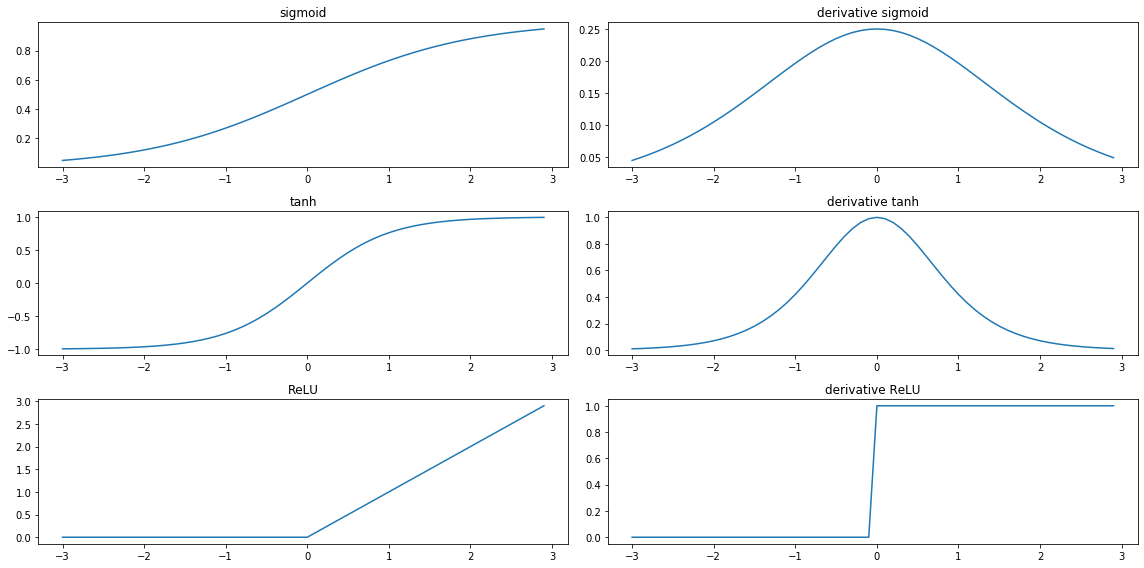

In [4]:
fig, _ = nnh.plot_activations( np.arange(-3,3, 0.1) )

The first thing to note is the different output ranges.

The particular task might dictate the Activation function for the final layer
- the range of tanh is $[-1,+1]$ which may be appropriate for $0$ centered outputs
- the range of sigmoid is $[0,1]$, which may be appropriate for
    - binary classifiers, or neurons that act as "gates" (on/off switches)
    - outputs that need to be in this range, such as probabilities
- **No** activation might be the right choice for a Regression task (unbounded output range)

The other thing to notice are the derivatives:
- both the tanh and sigmoid have large regions, at either tail, of near zero derivatives

- the derivative of the sigmoid has a maximum value of about 0.25
    
    

Although it is hard to appreciate at the moment
- Managing derivatives is
**one of the key** insights that enabled the explosive growth of DL !

We will explore this more in a subsequent lecture; for now:
- A zero derivative can hamper learning that uses Gradient Descent (tanh, sigmoid)
- The magnitude of the derivative modulates the "error signal" during back propagation
    - so smaller maximum values diminish the signal more than larger ones (sigmoid)
    

## What does the bias do ?

The bias term (e.g., in the Dense layer) seems like an isolated annoyance.

Far from it !

The Activations map inputs in a fixed range to outputs.

The bias (of layer $\ll$) shifts the input to layer $(\ll +1)$.

So although, for example, the ReLU "hinge" is located at $0$
- The bias of the previous layer
can effectively shift this point.

## Loss "Layers"

In the $L$ layer Sequential Model
- We sometimes see
an additional layer ($L + 1$) implementing the Cost/Loss function.

Although not truly a "layer" in the sense we have defined it
- It is not deriving a new representation
- It is a programming/mathematical convenience 
    - makes it easier to implement and analyze Gradient Descent when the Loss is $\y_{(L+1)}$


# Notation 2

Given many choices for a layer's activation function and its computation
we will write the input/output relation of layer $\ll$ as
$$
\y_{(\ll)} = a_{(\ll)}( f_{(\ll)}( \y_{(\ll-1)}, \W_{(\ll)}) )
$$
- $a_{(\ll)}$ is the activation function of layer $\ll$
- $f_{(\ll)}$ is the function computed by layer $\ll$
    - e.g., `Dense`: $f_{(\ll)}( \y_{(\ll-1)}, \W_{(\ll)}) = \y_\llp = \W_\llp \y_{(\ll-1)} + \b_\llp$

**Note** We neglect to add $\b_\llp$ as an argument to $f_\llp$ to simplify notation
- as a convenience we sometimes view $\b_\llp$ as being part of $\W_\llp$

<div>
    <center>Layers</center>
    <br>
<img src=images/NN_Layers_1.jpg width=600>
    </div>

# Loss/Cost functions 

We have framed Machine Learning (and DL in particular) as 
the task of minimizing a Cost/Loss function.

There are many such functions that we can consider.

We briefy discuss a few.

Let's begin by plotting some Cost functions

(Note: this statement is true regardless of whether the Loss is implemented as a layer.)

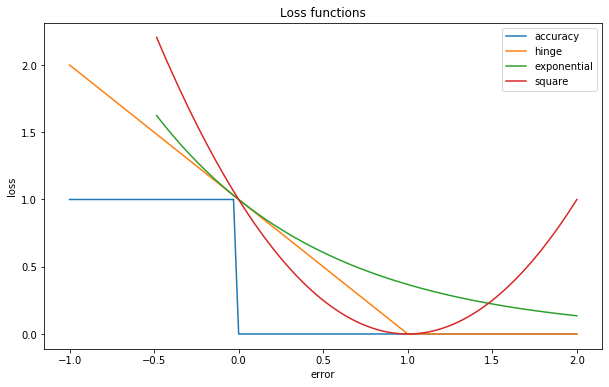

In [5]:
nnh.plot_loss_fns()

## Overview

First, let's state some basic properties of a loss/function:
- it should be positive
- it should be close to $0$ if the prediction is close to the correct value
- it should be **differentiable** (or at least sub-differentiable) if Gradient Descent is our optimizer

### Accuracy
- The non-differentiability of Accuracy **rules it out** as a Cost function

### Hinge Loss

We encountered this loss in the lecture on Support Vector Machines (SVM):
- It *is* sub-differntiable
- Is unusual in that there are elements in the domain where the Cost is *exactly* 0
- Gradient Descent will
    - **stop trying** to improve $\Theta, \W$ once the Cost is $0$
    - contrast this to Cross Entropy, where cost never reaches $0$
        - Gradient Descent will keep trying to improve $\Theta, \W$
        - Will try to increase score of already correct prediction
            - long after the probability threshold for Classification has been passed

# Complex Cost functions

The same training loop and Gradient Descent method is used to minimize all Cost functions

We can argue that the essence of Deep Learning is
- Defining a Cost function that captures the essence of the task you're trying to solve


## Neural Style Transfer: fun with Cost functions
![Neural Style Transfer](images/NeuralStyleTransfer.jpg)

# Scaling the inputs

Many times in this course we have pointed out that some models are *scale sensitive*.

Neural Networks are not *mathematically* sensitive but tend to be so *in practice*.

It is *highly recommended* to scale your data so their absolute values are around 1.0 or at least somewhat small.

Gradient Descent is the root of the problem:

- Two features on different scales can cause the optimizer to favor one over the other
- Activations can *saturate*
    - Output of dot product (Dense layer) is in the "flat* area of the activation
    - Zero derivative: no learning
- The Cost/Loss may be large in initial epochs when the target values are too different from the dot products
    - *Large* gradients: unstable learning
    - Weights are typically initialized to values less than 1.0, leading to small dot products
    

Remember: if you re-scale the inputs, you will need to invert the transformation when
communicating the results

# Some "Why's"

Here are some interesting questions to ask about Deep Learning

## Why was progress in DL so slow (decades) ? 

We will answer this more deeply in a subequent lecture; for now:
- Seemingly minor details turned out to be incredibily important !
    - Initialization of weights $\Theta, \W$ for Gradient Descent
    - Activations with large regions of zero gradient hampered learning
- Vanishing/Exploding Gradients
    - problems arise when the gradient is effectively  0
    - problems also occurs when they are effectively infinite

- Computational limits
    - It turns out to be quite important to make your NN big; bigger/faster machines help
    - Actually: bigger than it needs to be
        - many weights wind up near $0$, which renders the neurons useless
        - [The Lottery Ticket Hypothesis](https://arxiv.org/abs/1803.03635)
            - within a large network is a smaller, easily trained network
            - increasing network side increases the chance of large network containing a trainable subset
            - [summary](https://towardsdatascience.com/how-the-lottery-ticket-hypothesis-is-challenging-everything-we-knew-about-training-neural-networks-e56da4b0da27)


## Why do GPU's matter ?

[What makes TPU's fined tuned for Deep Learning](https://cloud.google.com/blog/products/ai-machine-learning/what-makes-tpus-fine-tuned-for-deep-learning)

GPU (Graphics Processing Unit): specially designed hardware to perform repeated
vector multiplications (a typical calculation in graphics processing).

- It is not general purpose (like a CPU) but does what it does extremely quickly, and using many
more cores than a CPU (typically several thousand).

- As matrix multiplication is a fundamental operation of Deep Learning, GPU's have the ability to greatly
speed up training (and inference).

Google has a further enhancement called a TPU (Tensor Processing Unit) to speed both training and inference.
-  highly specialized to eliminate bottlenecks (e.g., memory access) in fundamental Deep Learning matrix multiplication.

Both GPU's and TPU's 
- Incur an overhead (a "set up" step is needed before calculation).
- So speedup only for sufficiently large matrices, or long "calculation pipelines" (multiplying 
different examples by the same weights).

DL involves 
- Multiplying large matrices (each example) 
- By large matrices (weights, which are same for each example in batch)
- Both GPU's and TPU's offer the possibility of large speed ups.

- GPU's are **not** necessary
    - but they are a **lot** faster
    - life changing experience
        - 30x faster means your 10 minute run (that ended in a bug) now only takes 20 seconds
        - increases your ambition by faster iteration of experimental cycle

In [6]:
print("Done")

Done
